In [1]:
import numpy as np
import pandas as pd 

import os

# folder_path = r'..\My-CNN-projects\dataset\\'

print(os.listdir(r'C:\Users\bashah\OneDrive - Ncell Axiata Limited\ncell\Development\My-CNN-projects\dataset'))



['Face_expression']


In [2]:
import tensorflow as tf 

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 

In [4]:
filename = r'C:\Users\bashah\OneDrive - Ncell Axiata Limited\ncell\Development\My-CNN-projects\dataset\Face_expression\Dec2023.csv'
label_map = ['Anger',
             'Disgust',
             'Fear',
             'Happy',
             'Sad',
             'Surprise',
             'Neutral']
names=['emotion','pixels','usage']


In [5]:
df=pd.read_csv(r'C:\Users\bashah\OneDrive - Ncell Axiata Limited\ncell\Development\My-CNN-projects\dataset\Face_expression\Dec2023.csv', names=names, na_filter=False)


In [6]:
# im=df['pixel']
df.head(10)

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [7]:
im = df['pixels']

In [8]:
def getData(filename):

    Y = []
    X = []

    first = True
    for line in open(filename):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])
            
    X, Y = np.array(X) /255.0, np.array(Y)
    return X, Y

In [9]:
X, Y = getData(filename)
num_class = len(set(Y))
print(num_class)

7


In [10]:
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [12]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers import BatchNormalization

In [13]:
def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    # UNCOMMENT THIS TO VIEW THE ARCHITECTURE
    #model.summary()
    
    return model
model=my_model()
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)     

In [22]:
from keras import backend as K
from keras.callbacks import ModelCheckpoint
# from your_module import my_model  # Replace 'your_module' with the actual module where my_model is defined

# Rest of your code...
path_model = 'model_filter.h5'  # save model at this location after each epoch
K.clear_session()  # destroys the current graph and builds a new one
model = my_model()  # create the model
K.set_value(model.optimizer.lr, 1e-3)  # set the learning rate

# fit the model
h = model.fit(
    x=X_train,
    y=y_train,
    batch_size=64,
    epochs=5,
    verbose=1,
    validation_data=(X_test, y_test),
    shuffle=True,
    callbacks=[
        ModelCheckpoint(filepath=path_model),
    ]
)


Epoch 1/5
505/505 [==============================] - 818s 2s/step - loss: 1.6901 - accuracy: 0.3381 - val_loss: 1.6156 - val_accuracy: 0.3505
Epoch 2/5
505/505 [==============================] - 805s 2s/step - loss: 1.3393 - accuracy: 0.4897 - val_loss: 1.3214 - val_accuracy: 0.4999
Epoch 3/5
505/505 [==============================] - 697s 1s/step - loss: 1.1573 - accuracy: 0.5606 - val_loss: 1.1781 - val_accuracy: 0.5486
Epoch 4/5
505/505 [==============================] - 658s 1s/step - loss: 1.0270 - accuracy: 0.6176 - val_loss: 1.2298 - val_accuracy: 0.5506
Epoch 5/5
505/505 [==============================] - 652s 1s/step - loss: 0.9069 - accuracy: 0.6639 - val_loss: 1.1943 - val_accuracy: 0.5419


In [23]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [24]:
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
plt.show()

In [25]:
y_pred=model.predict(X_test)
#print(y_pred)
y_test.shape

113/113 [==============================] - 16s 141ms/step


(3589, 7)

1/1 [==============================] - 0s 47ms/step


c:\Users\bashah\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


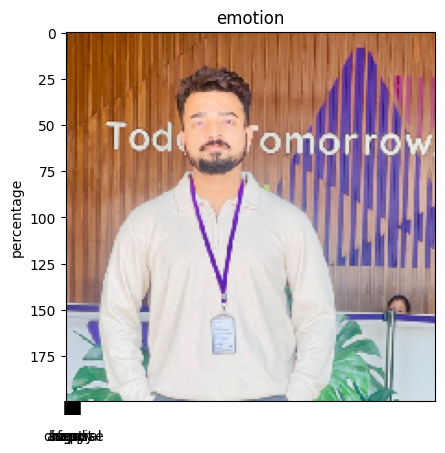

Expression Prediction: sad


In [27]:
from skimage import io
img = image.load_img(r'C:\Users\bashah\OneDrive - Ncell Axiata Limited\ncell\Development\My-CNN-projects\dataset\a.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img(r'C:\Users\bashah\OneDrive - Ncell Axiata Limited\ncell\Development\My-CNN-projects\dataset\a.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])

1/1 [==============================] - 0s 130ms/step


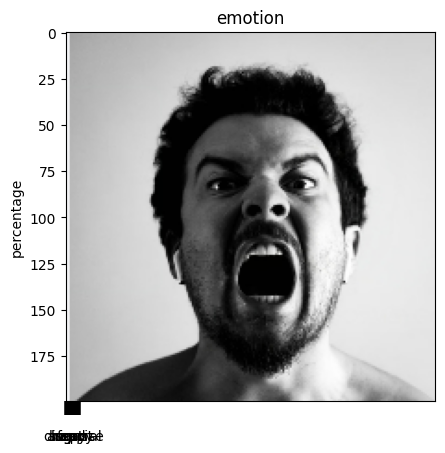

Expression Prediction: sad


In [28]:
from skimage import io
img = image.load_img(r'C:\Users\bashah\OneDrive - Ncell Axiata Limited\ncell\Development\My-CNN-projects\dataset\b.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img(r'C:\Users\bashah\OneDrive - Ncell Axiata Limited\ncell\Development\My-CNN-projects\dataset\b.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])

1/1 [==============================] - 0s 89ms/step


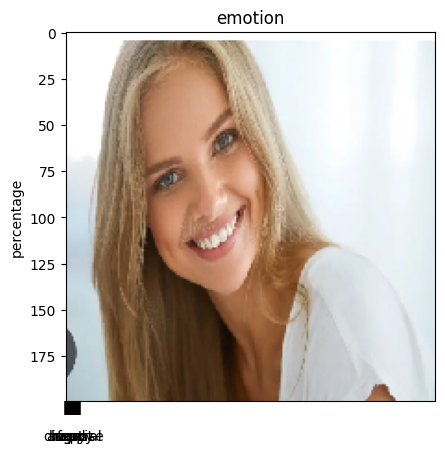

Expression Prediction: fear


In [29]:
from skimage import io
img = image.load_img(r'C:\Users\bashah\OneDrive - Ncell Axiata Limited\ncell\Development\My-CNN-projects\dataset\c.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img(r'C:\Users\bashah\OneDrive - Ncell Axiata Limited\ncell\Development\My-CNN-projects\dataset\c.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])

1/1 [==============================] - 0s 118ms/step


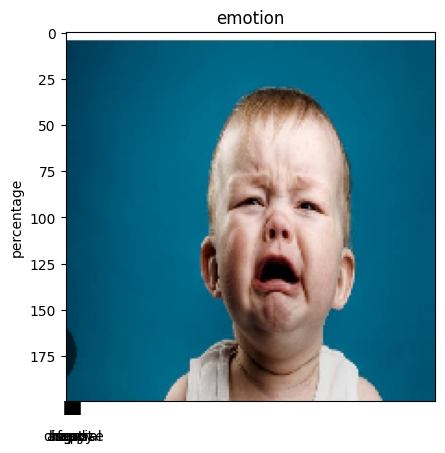

Expression Prediction: fear


In [30]:
from skimage import io
img = image.load_img(r'C:\Users\bashah\OneDrive - Ncell Axiata Limited\ncell\Development\My-CNN-projects\dataset\d.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img(r'C:\Users\bashah\OneDrive - Ncell Axiata Limited\ncell\Development\My-CNN-projects\dataset\d.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])